In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings 
warnings.filterwarnings("ignore") #ignore some matplotlib warnings

import numpy as np

from triqs.plot.mpl_interface import plt
plt.rcParams["figure.figsize"] = (6,5) # set default size for all figures

from triqs.utility.redirect import start_redirect
start_redirect()

# Dynamical spin-spin susceptibility $\chi_{S_z S_z}(\tau)$

CTHYB can measure dynamical susceptibilities $\chi_{\hat{O}_1 \hat{O}_2}(\tau)$ of operators $\hat{O}_i$ that commute with the local Hamiltonian $[H_{loc}, \hat{O}_i] = 0$. This is performed using "sampling by insertion".

Here we reuse the Anderson model in a Wilson bath from the first tutorail and sample its spin-spin susceptibility

$$\chi_{S_z S_z} = \langle S_z(\tau) S_z(0) \rangle$$ 

using the ``measure_O_tau`` parameter, by passing the pair of operators to sample. In this case the spin-z operator $S_z = (n_\uparrow - n_\downarrow)/2$.

The one-orbital Anderson impurity embedded in a flat (Wilson) conduction bath, with non-interacting Green's function $G^{-1}_{0,\sigma} (i\omega_n) = i \omega_n - \epsilon_f - V^2 \Gamma_\sigma(i \omega_n)$, and local interaction
$H_\mathrm{int} = U n_\uparrow n_\downarrow$, with Hubbard $U$, local energy $\epsilon_f$, bandwidth $D$ and hybridization $V$ at the inverse temperature of $\beta$.

In [2]:
from triqs.operators import n
from h5 import HDFArchive
from triqs.gf import inverse, iOmega_n, Wilson

from triqs_cthyb import Solver

U, e_f, D, V, beta = 5., -2.5, 1., 1., 10.
Sz = 0.5 * ( n('up', 0) - n('down', 0) )

S = Solver(
    beta=beta, gf_struct=[('up',[0]), ('down',[0])],
    n_tau=400, n_iw=50,)

S.G0_iw << inverse(iOmega_n - e_f - V**2 * Wilson(D))

S.solve(
    h_int=U*n('up',0)*n('down',0),
    n_cycles=10000,
    length_cycle=20,
    n_warmup_cycles=100,
    measure_O_tau=(Sz, Sz),
    measure_O_tau_min_ins=100,
    )


╔╦╗╦═╗╦╔═╗ ╔═╗  ┌─┐┌┬┐┬ ┬┬ ┬┌┐ 
 ║ ╠╦╝║║═╬╗╚═╗  │   │ ├─┤└┬┘├┴┐
 ╩ ╩╚═╩╚═╝╚╚═╝  └─┘ ┴ ┴ ┴ ┴ └─┘

The local Hamiltonian of the problem:
(-2.5,0)*c_dag('down',0)*c('down',0) + (-2.5,0)*c_dag('up',0)*c('up',0) + (5,0)*c_dag('down',0)*c_dag('up',0)*c('up',0)*c('down',0)
Using autopartition algorithm to partition the local Hilbert space
Found 4 subspaces.

Warming up ...

Accumulating ...
17:19:09   1% ETA 00:00:07 cycle 140 of 10000
17:19:11  35% ETA 00:00:03 cycle 3587 of 10000
17:19:14  78% ETA 00:00:01 cycle 7869 of 10000


[Rank 0] Collect results: Waiting for all mpi-threads to finish accumulating...
[Rank 0] Timings for all measures:
Measure                 | seconds   
Average sign            | 0.00148106
G_tau measure           | 0.0117463 
O_tau insertion measure | 4.88952   
Total measure time      | 4.90274   
[Rank 0] Acceptance rate for all moves:
Move set Insert two operators: 0.0881532
  Move  Insert Delta_up: 0.0870787
  Move  Insert Delta_down: 0.0892352
Move set Remove t

Starting on 1 Nodes at : 2019-06-05 17:19:09.074932


The measured susceptibility is stored in the member property ``S.O_tau`` and can be plotted using the TRIQS ``oplot`` command.

(0, 0.25)

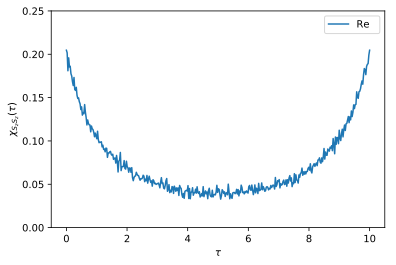

In [3]:
from triqs.plot.mpl_interface import oplot, oplotr, plt

oplotr(S.O_tau)
plt.ylabel(r'$\chi_{S_z S_z}(\tau)$');
plt.ylim([0, 0.25])

Author: H. U.R. Strand (2019)